## Лабораторна робота № 1 
#### Рижкін Юрій
###### Варіант 9

### Частина 1 

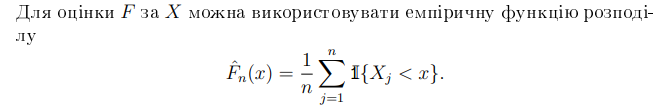

In [1]:
Femp <- function(x , sample){
    return (1/length(sample)*sum(sample < x))
}

In [2]:
n <- c(10,50,100,500,1000)
lambda <- 0.5


In [96]:
N <- 100
sample = rexp(N,0.5)
q_001 <- quantile(sample,0.01)
q_099 <- quantile(sample,0.99)

In [97]:
plot_real_empiric <- function (N){
    sample = rexp(N,0.5)
     q_001 <- qexp(0.01,0.5)
     q_099 <- qexp(0.99,0.5)
     sequence = seq(q_001, q_099, length.out = N)
    plot(sequence, pexp(sequence,0.5), ylab='F', main=paste('n =',N))
    points(sequence, sapply(sequence, Femp, sample=sample), col= 'red', lwd=2) 
    
     
     legend(0.2, 1, legend=c("F", "Femp"),
     col=c("black", "red"), lty=1:1)
}

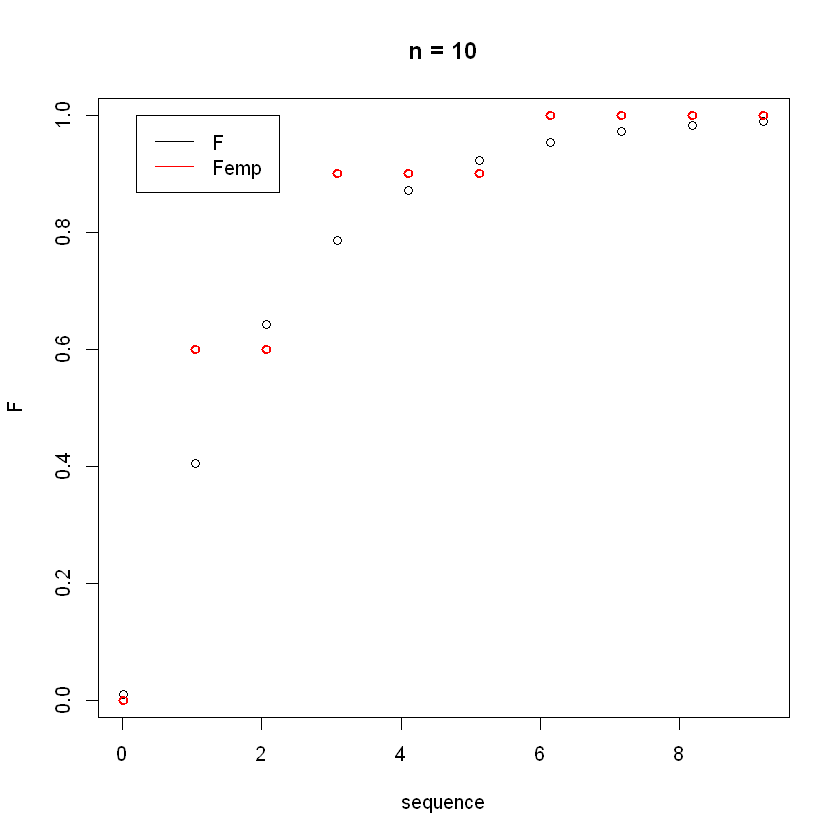

In [98]:
plot_real_empiric(n[1])

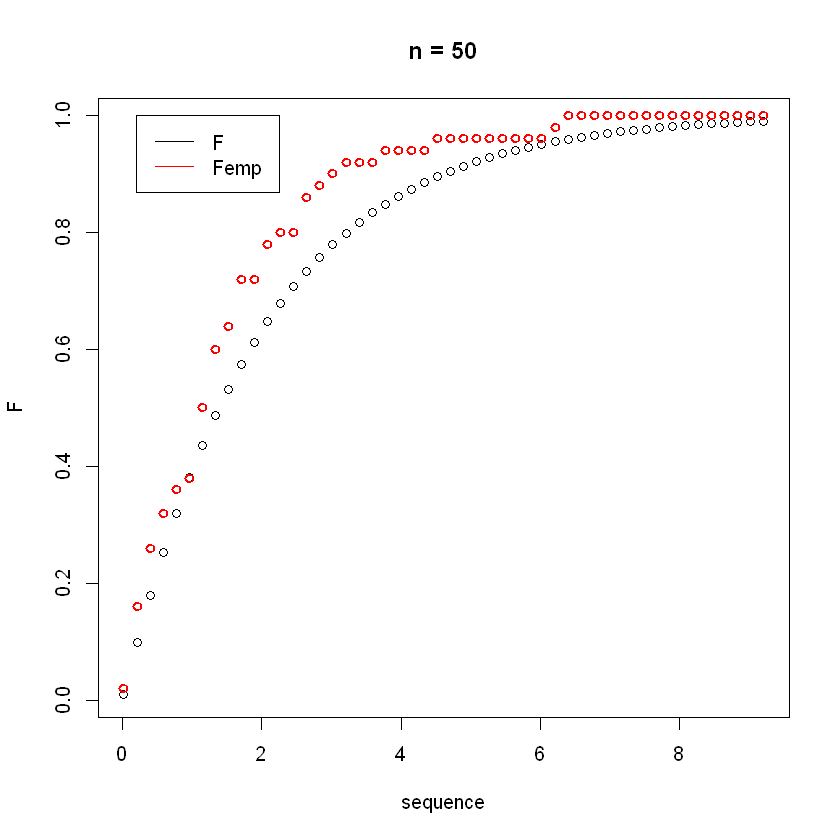

In [99]:
plot_real_empiric(n[2])

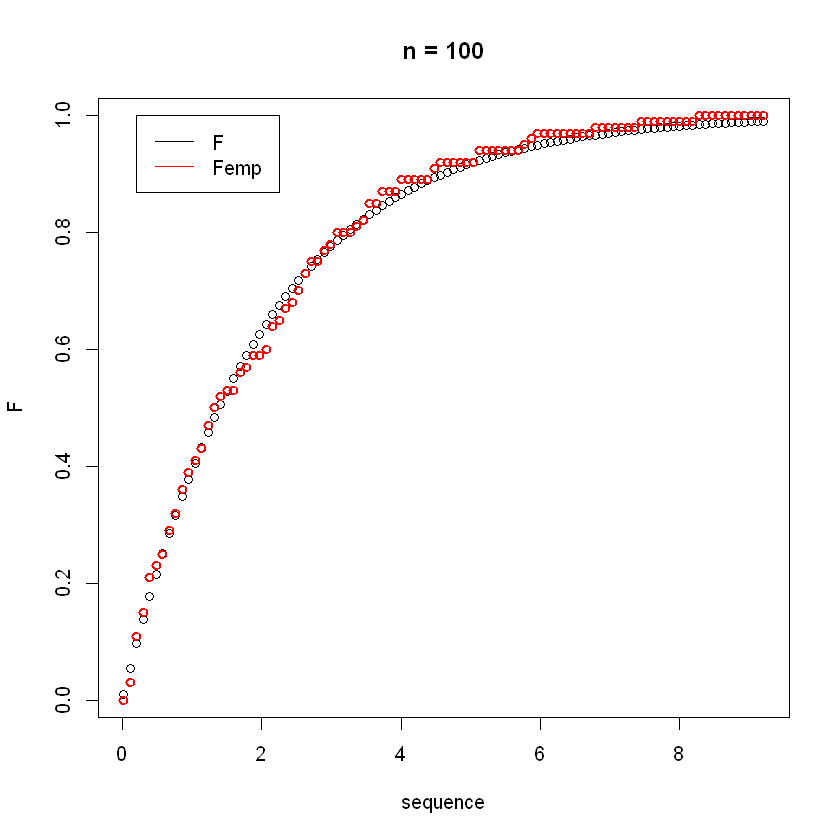

In [100]:
plot_real_empiric(n[3])

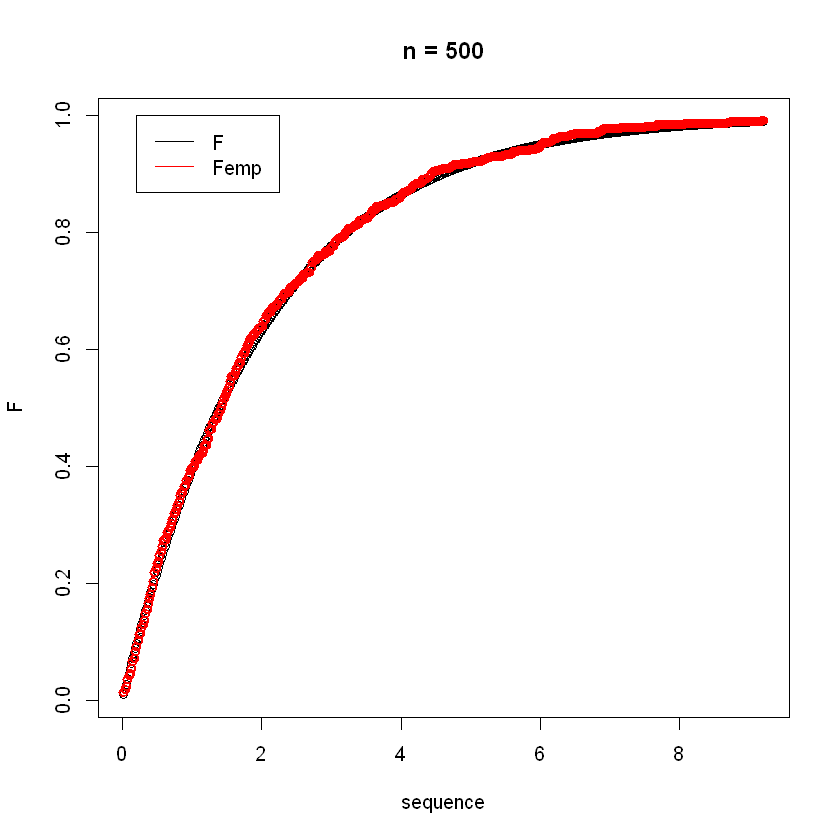

In [101]:
plot_real_empiric(n[4])

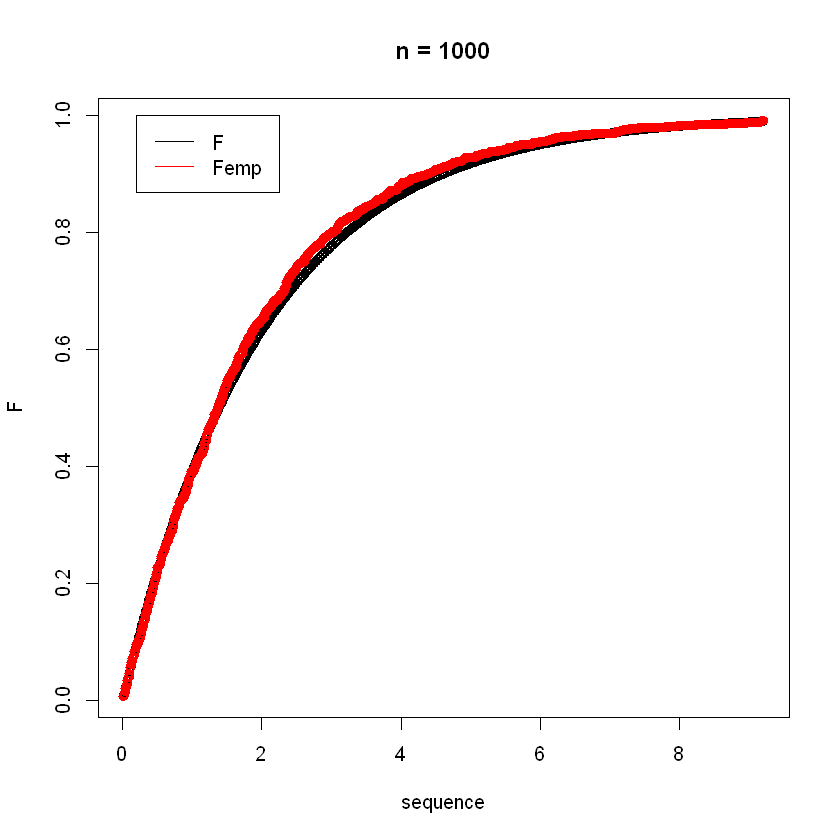

In [102]:
plot_real_empiric(n[5])

Очевидно, що зі збільшенням кількості елементів в вибірці функція розподілу емпірична все більше і більше схожа на теоретичну. 

#### Довірчі інтервали


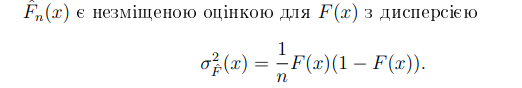

In [11]:
Fconf = function (x,sample,alpha){
    x <- Femp(x,sample)
    lambda <- qnorm(1-alpha/2)
    sigma <- sqrt(x*(1-x)/length(sample))
    
    l  <- x - lambda*sigma 
    r  <- x + lambda*sigma

    return (c(l,r))
}

In [12]:
Fconf(qexp(0.5,1/2),rexp(n,1/2),0.95)

[1] 0.7887827 0.8112173

In [45]:

check = function(x,N,alpha,real){
    check = 0
    for ( i in 1:10000){
     arr = rexp(N,1/2)
     interval  = Fconf(x,arr,alpha)
     if (real>=interval[1] && real<=interval[2]){
         check = check+1
         }
    }
    return (check/10000*100)
}


In [14]:
quantiles  = qexp(c(0.2,0.5,0.75),1/2)
quantiles

[1] 0.4462871 1.3862944 2.7725887

In [32]:
res  = matrix(replicate(length(n)*length(quantiles),0),nrow = length(n))
rownames(res) = c("10", "50", "100", "500", "1000")
colnames(res) = c("q0.2", "q0.5", "q0.75")
alpha = 0.05

In [46]:
for ( i in 1:length(n)){
    for ( j in 1:length(quantiles)){
        real = pexp(quantiles[j],0.5)
        res[i,j] = check(quantiles[j],n[i],alpha,real)
        }
}

In [47]:
res

,q0.2,q0.5,q0.75
10,89.12,89.37,92.34
50,93.82,93.57,93.91
100,93.46,94.37,94.27
500,94.99,94.29,94.10
1000,94.74,94.81,94.41


Можемо спостерігати те, що наш при збільшенню кількості елементів в вибірці кількість значень все ближче і ближче підходить до 95%

### Частина 2

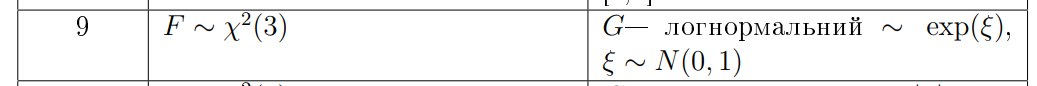

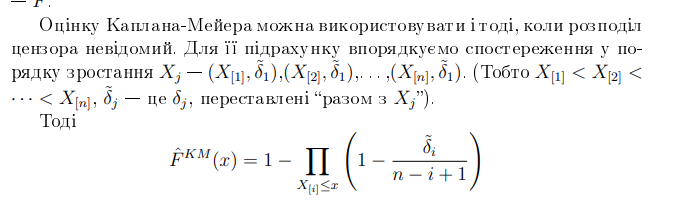

In [54]:
FKM = function(x,sample,delta) {

 order_sample = order(sample)
 sort_sample = sort(sample)
 n = length(sample)

 prod = 1
 for(i in which(sort_sample < x)) {
 prod = prod * (1 - delta[order_sample[i]] / (n - i + 1))
 }

 return(1 - prod)

}

In [55]:
plot_part_two = function(n) {
 F = rchisq(n,df=3)
 G = rlnorm(n,0,1)
 X = c()
 delta = c()
 for(i in 1:n) {
 if(F[i] < G[i]) {
     X = c(X, F[i])
     delta = c(delta, 1)
 }
 else {
     X = c(X, G[i])
     delta = c(delta, 0)
 }

 }

 sequence = seq(qchisq(0.01,df=3), qchisq(0.99,df=3), length.out = n)
 plot(sequence, pchisq(sequence,df=3), ylab='F', main=paste('n =',n))
 points(sequence, sapply(sequence, FKM, sample=X, delta=delta), col= 'red', lwd=2)
 legend(0.2, 1, legend=c("F", "FKM"),
 col=c("black", "red"), lty=1:1)
}


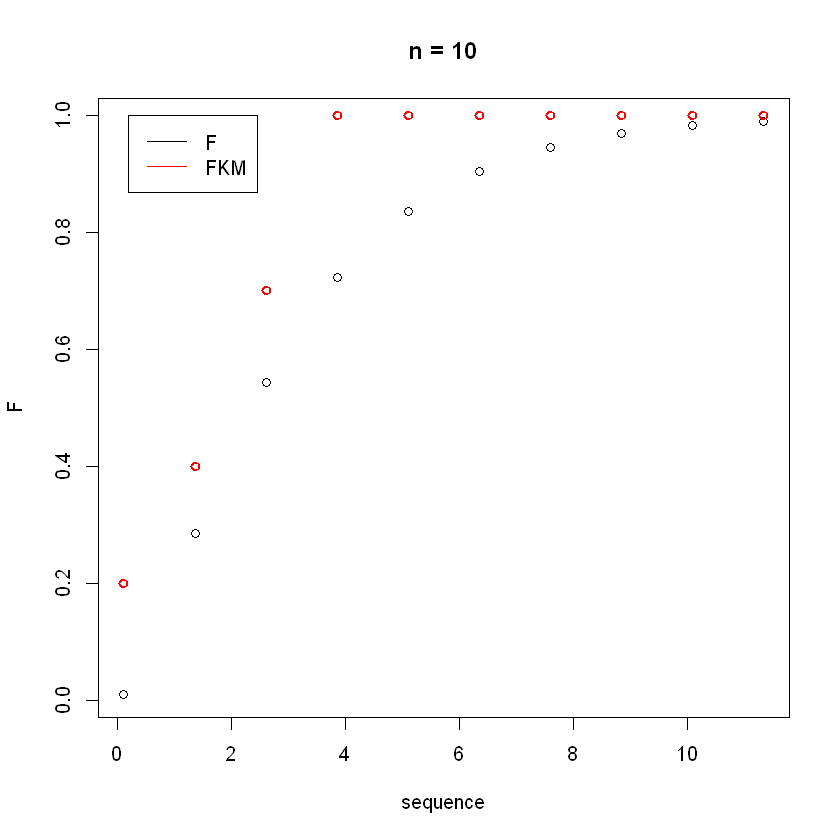

In [56]:
plot_part_two(n[1])

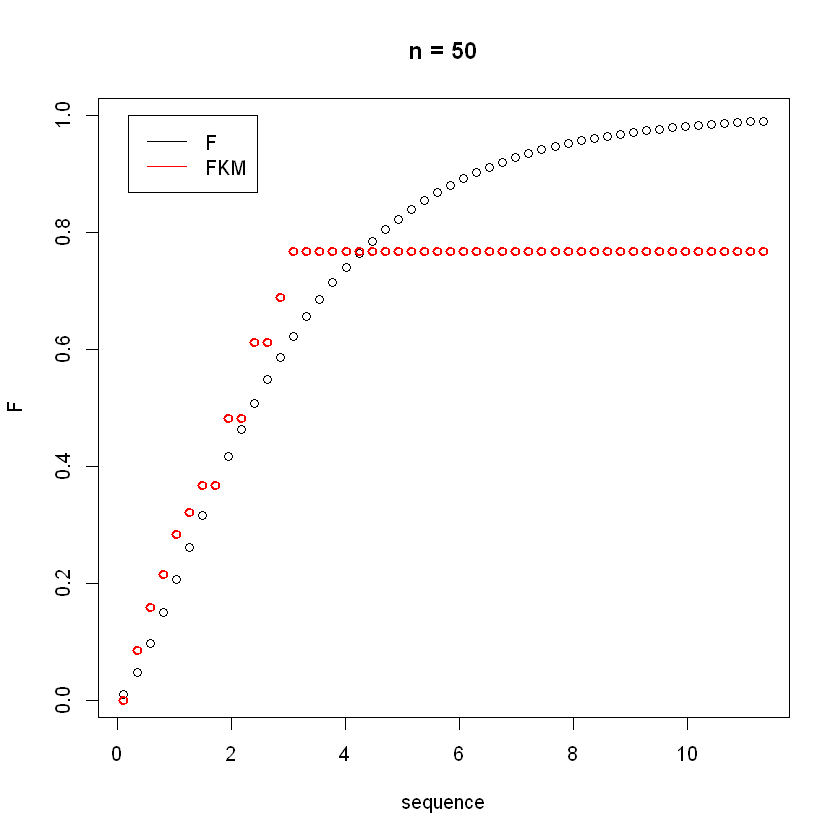

In [57]:
plot_part_two(n[2])

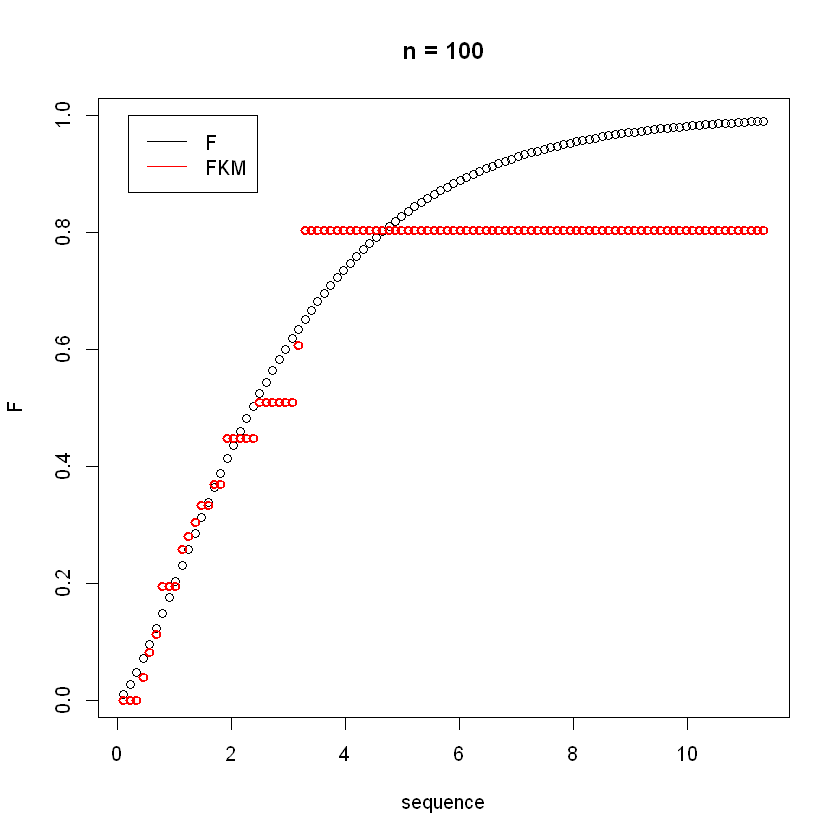

In [58]:
plot_part_two(n[3])

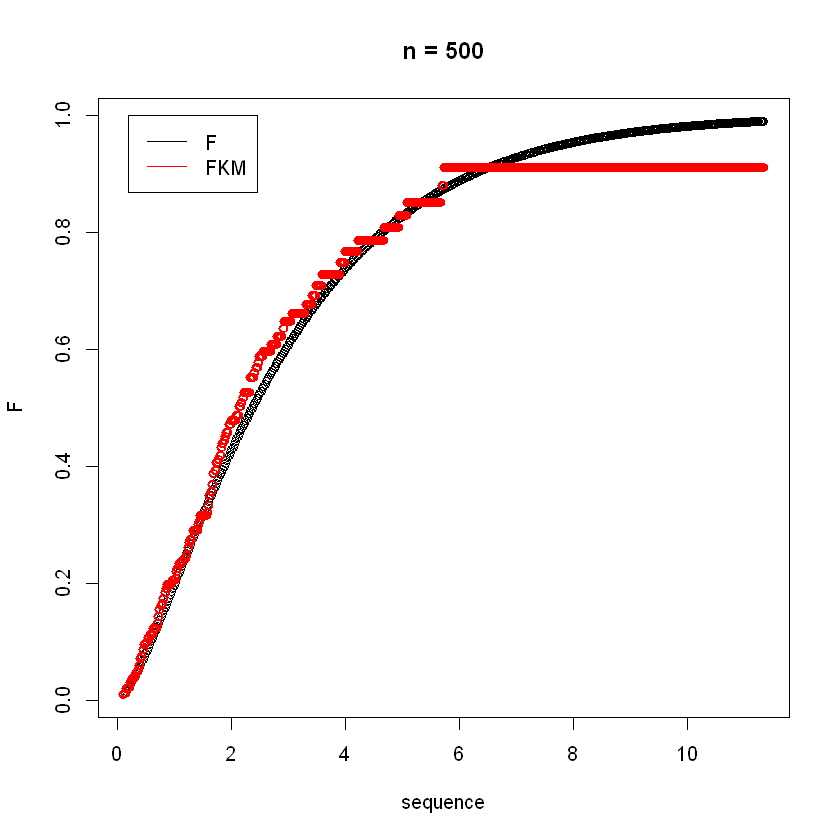

In [59]:
plot_part_two(n[4])

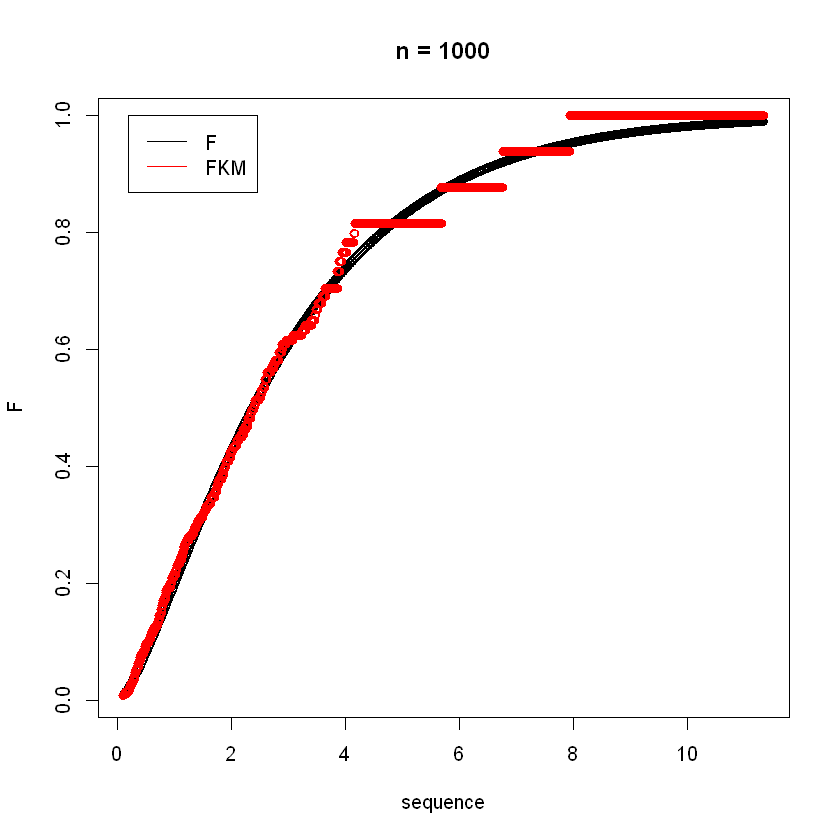

In [60]:
plot_part_two(n[5])

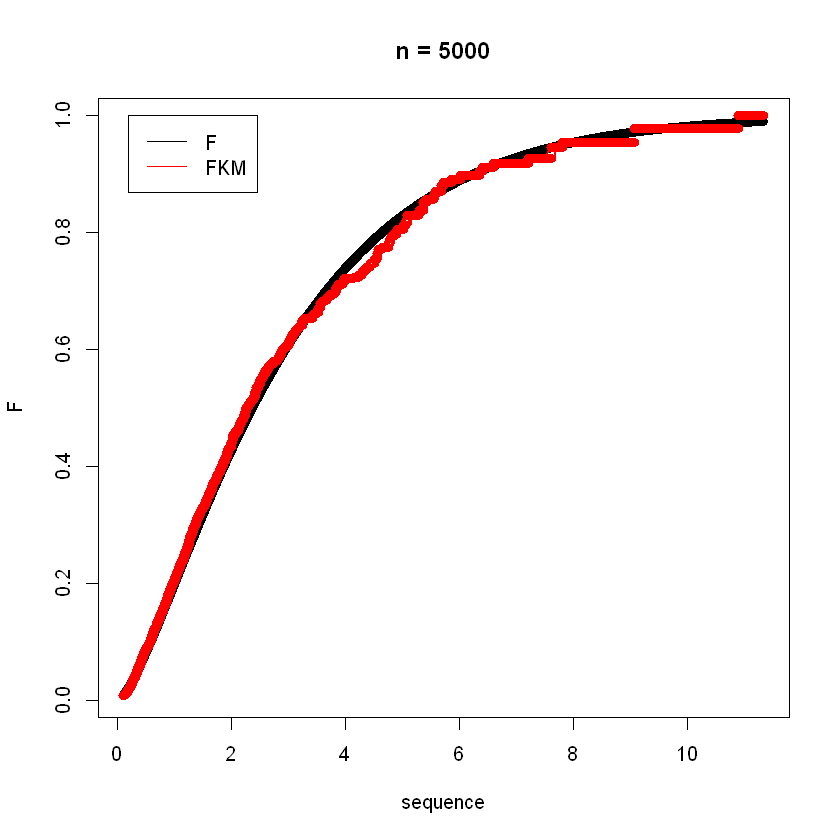

In [69]:
plot_part_two(5000)

Як і в першій частині зі збільшенням розмірки у нас все краще стає наближення, проте воно значно гірше ніж в першому варіанті. 

In [103]:
generateCensored = function(n) {
 F = rchisq(n,df=3)
 G = rlnorm(n,0,1)
 X = c()
 delta = c()
 for(i in 1:n) {
 if(F[i] < G[i]) {
 X = c(X, F[i])
 delta = c(delta, 1)
 }
 else {
 X = c(X, G[i])
 delta = c(delta, 0)
 }

 }
 return(list(X = X, delta = delta))
}


In [72]:
m = 1000
estF = function(n) {
 censoredSamples = replicate(m, generateCensored(n))

 x = qchisq(1/2,df=3)

 estimates = c()

 for(i in 1:m){
 est = FKM(x, censoredSamples[, i]$X, censoredSamples[, i]$delta)
 estimates = c(estimates, est)
 }
 return(estimates)
}


In [109]:
histi = function(n) {
 X = estF(n)
 h = hist(X, xlab="Estimates",main=paste("n =", n))
 curve(dnorm(x, mean=mean(X), sd=sqrt(var(X)))*length(X)*(h$breaks[2]-h$breaks[1]), lwd=2, add=TRUE)
}


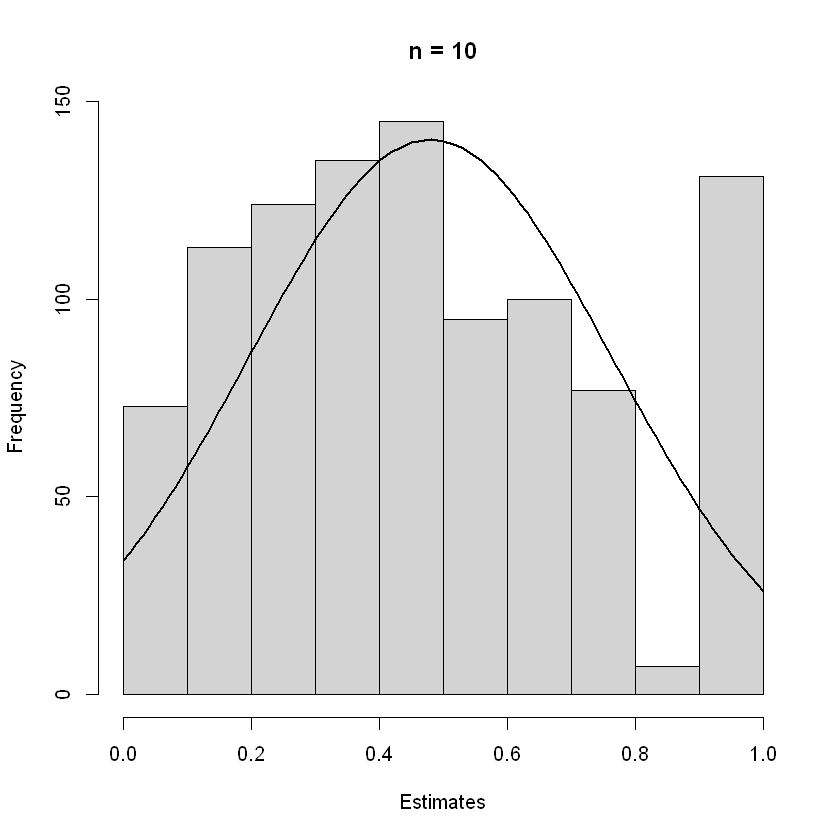

In [110]:
histi(n[1])

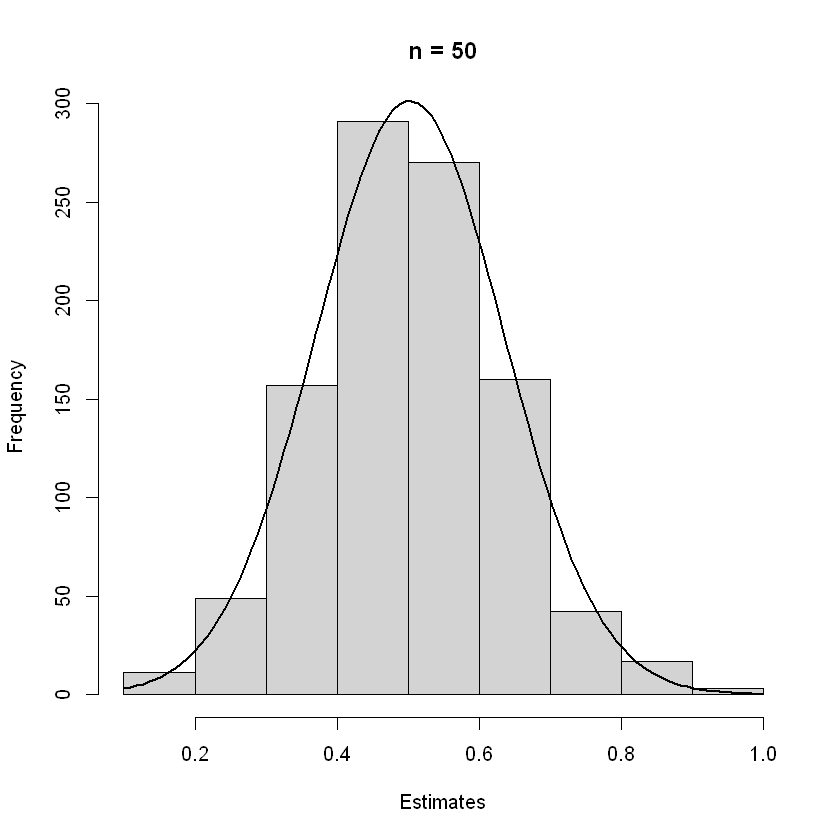

In [111]:
histi(n[2])

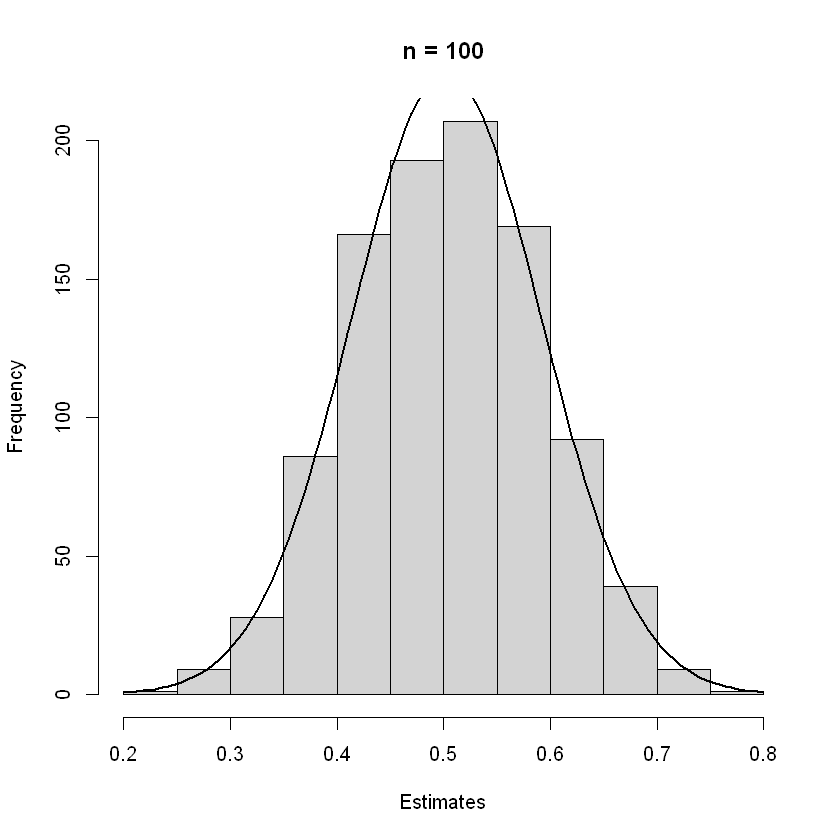

In [77]:
histi(n[3])

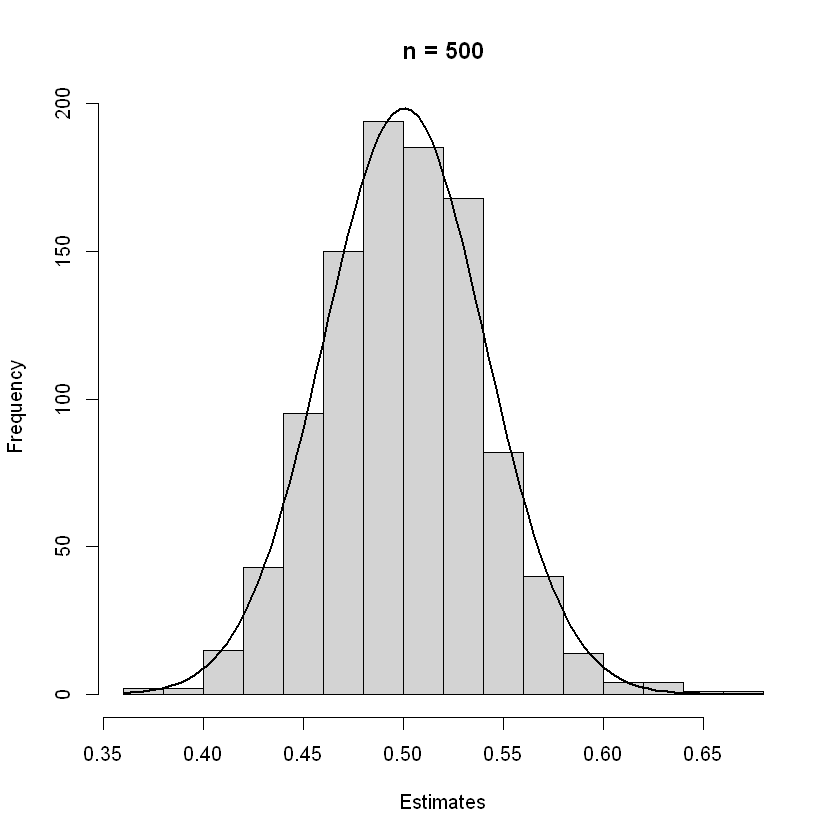

In [78]:
histi(n[4])

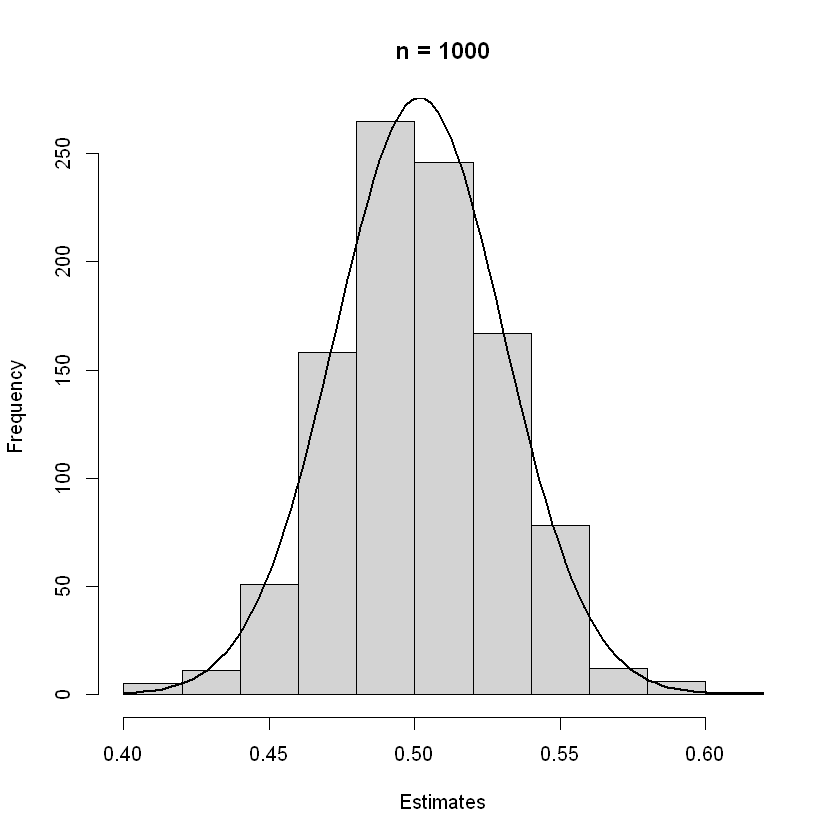

In [79]:
histi(n[5])

При першому варіанті у нас починаючи з кількості в 50 елементів в вибірці почали 

In [81]:
m = 1000
estlogF = function(n) {
 censoredSamples = replicate(m, generateCensored(n))

 x = qchisq(1/2,df=3)

 estimates = c()

 for(i in 1:m){
 est = log(1 - FKM(x, censoredSamples[, i]$X, censoredSamples[, i]$delta))
 estimates = c(estimates, est)
 }
 return(estimates)
}

In [83]:
histi_2 = function(n) {
 X = estlogF(n)
 h = hist(X, xlab="Estimates",main=paste("n =", n))
 curve(dnorm(x, mean=mean(X), sd=sqrt(var(X)))*length(X)*(h$breaks[2]-h$breaks[1]), lwd=2, add=TRUE)
}


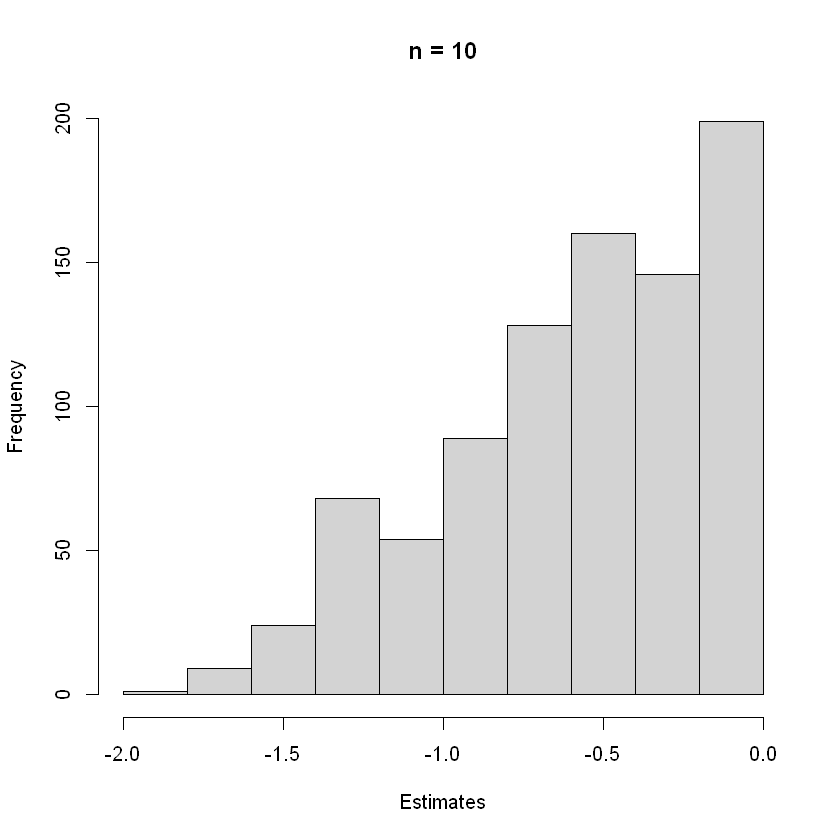

In [84]:
histi_2(n[1])

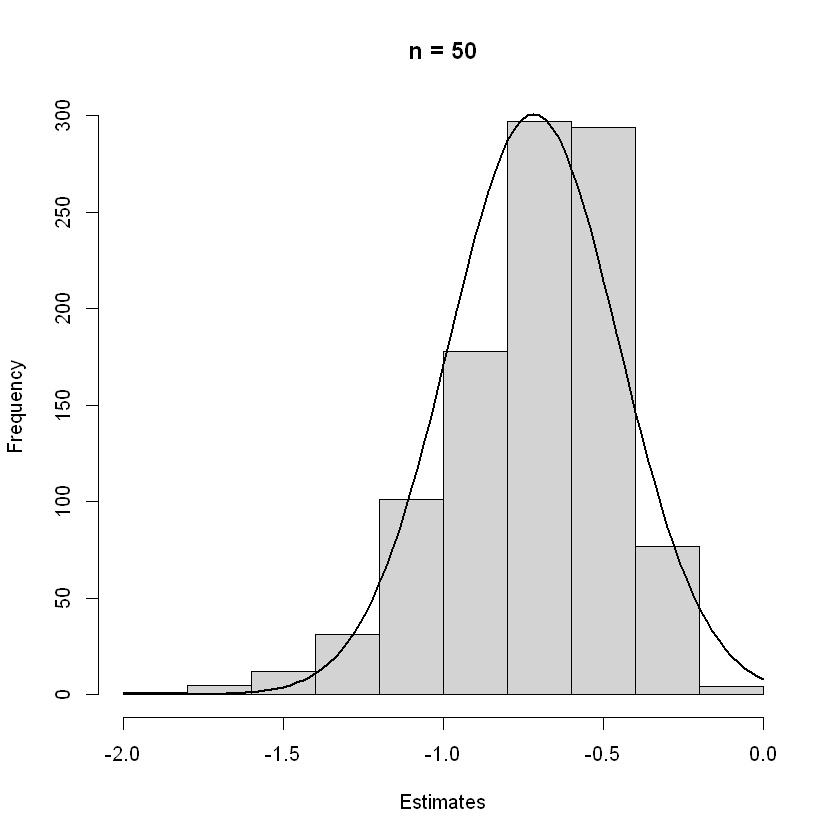

In [85]:
histi_2(n[2])

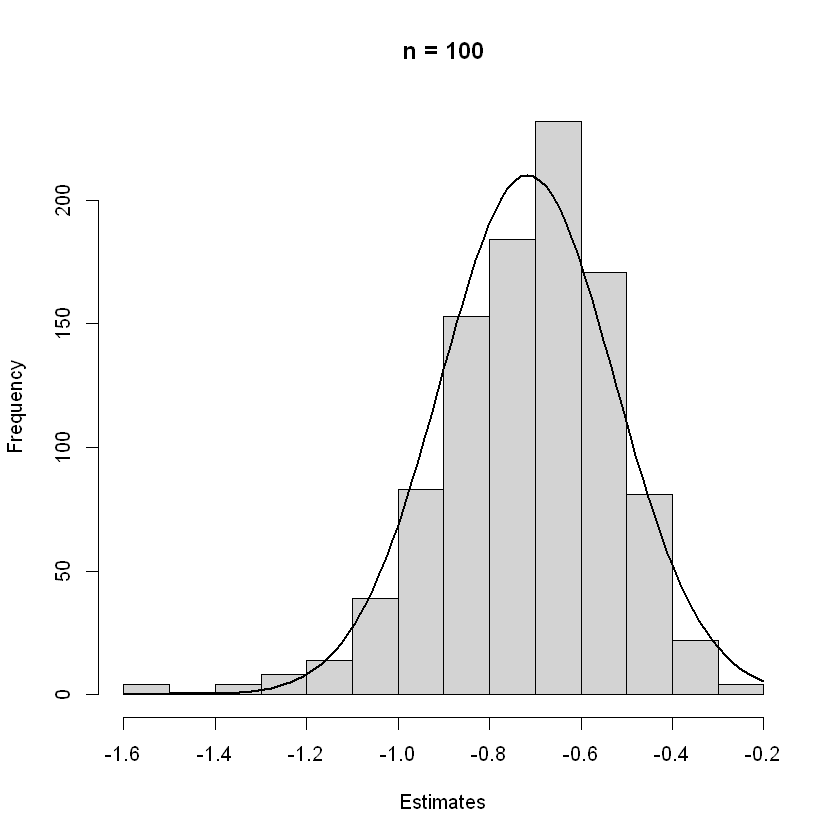

In [86]:
histi_2(n[3])

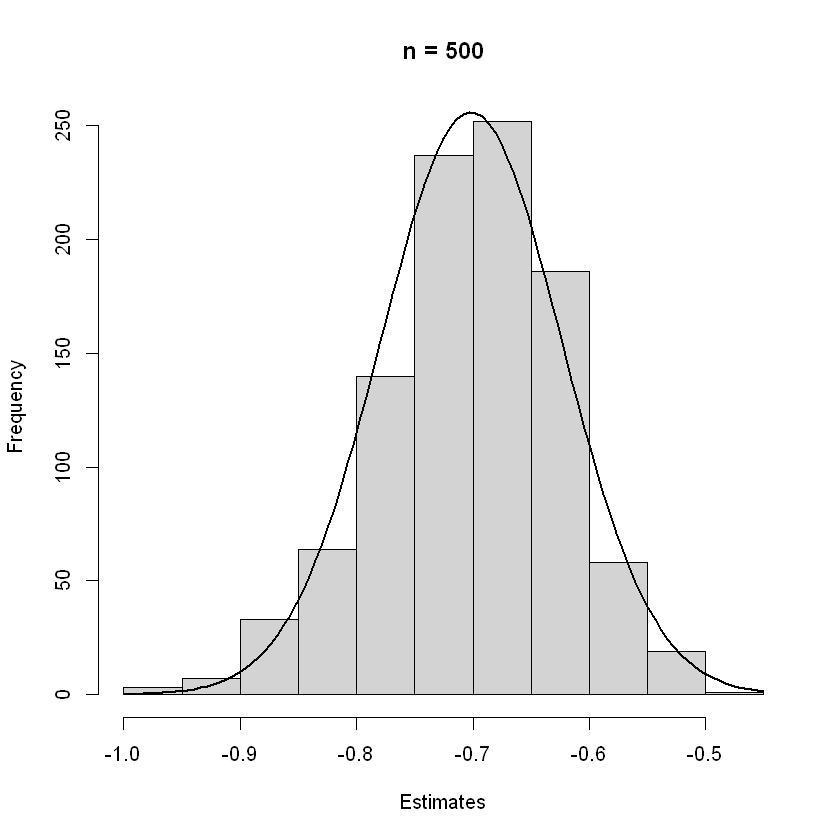

In [87]:
histi_2(n[4])

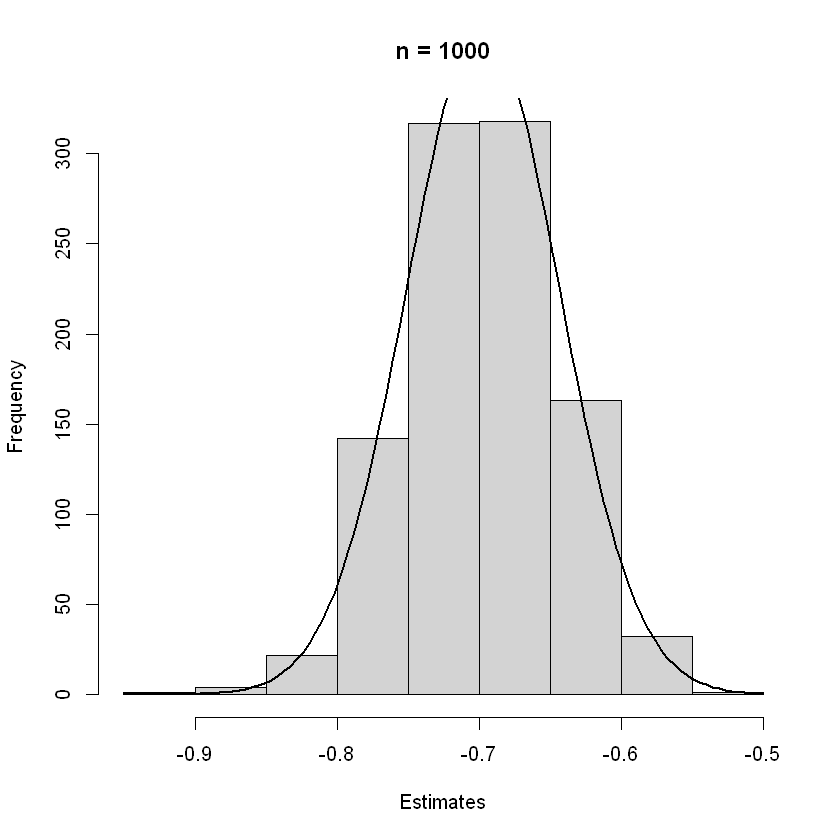

In [88]:
histi_2(n[5])

В другому випадку у нас дані розподілені гірше ніж в першому варіанті. Хоча можна сказати, що обидва варіанти асимптотично нормальні при достатньо великкому розмірі вибірки

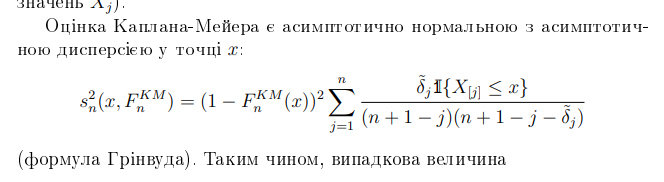

In [121]:
greenwood = function(x, sample, delta) {

 order_sample = order(sample)
 sort_sample = sort(sample)
 n = length(sample)

 sum = 0
 for(j in which(sort_sample < x)) {
 if(n - j + 1 - delta[order_sample[j]] != 0) {
 sum = sum + delta[order_sample[j]] / ((n - j + 1)*(n - j + 1 - delta[order_sample[j]]))
 }
 }
 return((1-FKM(x, sample, delta))^2*sum)
}


In [122]:
FKM_conf1 = function(x, sample, delta, alpha) {
 FKM_x = FKM(x, sample, delta)
 lambda = qnorm(1-alpha/2)
 sigma_hat = sqrt(greenwood(x, sample, delta))
 left = FKM_x - lambda * sigma_hat
 right = FKM_x + lambda * sigma_hat

 return(c(left, right))
}


In [124]:
frequencyCalcF = function(x, n, alpha, realValue) {

 censoredSamples = replicate(m, generateCensored(n))
 intervals = c()

 for(i in 1:m){
 est = FKM_conf1(x, censoredSamples[, i]$X, censoredSamples[, i]$delta, alpha=alpha)
 intervals = cbind(intervals, est)
 }

check = apply(intervals, FUN=function(interval, value)
 {if(value >= interval[1] && value <= interval[2]) {return(1)}else(return(0))}, value=realValue, MARGIN  = 2)

 return(sum(check) / m)
}


In [130]:
res = matrix(replicate(length(n) * 1, 0), nrow=length(n))
rownames(res) = c("10", "50", "100", "500", "1000")
colnames(res) = c("q1/2")
m = 1000
alpha = 0.05
for(i in 1:length(n)) {

 realValue = 1/2
 res[i,1] = frequencyCalcF(qchisq(1/2,df=3), n[i], alpha, realValue)
}


In [131]:
res

,q1/2
10,0.693
50,0.912
100,0.926
500,0.956
1000,0.949


In [127]:
FKM_conf2 = function(x, sample, delta, alpha) {

 FKM_x = FKM(x, sample, delta)
 if(FKM_x != 1) {

 logFKM_x = log(1-FKM_x)
 lambda = qnorm(1-alpha/2)
 sigma_hat = sqrt(greenwood(x, sample, delta) / (1-FKM_x)^2)
 left = logFKM_x - lambda * sigma_hat
 right = logFKM_x + lambda * sigma_hat
 return(c(left, right))

 }
}


In [128]:
frequencyCalclogF = function(x, n, alpha, realValue) {

 censoredSamples = replicate(m, generateCensored(n))
 intervals = c()

 for(i in 1:m){
 est = FKM_conf2(x, censoredSamples[, i]$X, censoredSamples[, i]$delta, alpha=alpha)
 intervals = cbind(intervals, est)
 }
 check = apply(intervals, FUN= function(interval, value)
 {
 if(value >= interval[1] && value <= interval[2]) {return(1)}else(return(0))
 }, value=realValue, MARGIN=2)
 return(sum(check) / m)
}

In [134]:
resLogF = matrix(replicate(length(n) * 1, 0), nrow=length(n))
rownames(resLogF) = c("10", "50", "100", "500", "1000")
colnames(resLogF) = c("q1/2")
m = 1000
alpha = 0.05
for(i in 1:length(n)) {

 realValue = log(1-1/2)
 resLogF[i,1] = frequencyCalclogF(qchisq(1/2,df=3), n[i], alpha, realValue)
}

resLogF

,q1/2
10,0.604
50,0.923
100,0.937
500,0.958
1000,0.960


Два способа мають доволі схожі відсотки входжень тому ми можемо використовувати будь-які з них для кількості елементів в розподілі > 500